# Importing Important File regarding Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import time
import ipywidgets
#from ipython.display import display


In [2]:
data1 = pd.read_csv("covid_19_india (1).csv",dayfirst=True)

In [3]:
data1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
15109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning of Covid 19 india

In [4]:
missing_values = ["NaN","na","Na","-"]
data1 = pd.read_csv("covid_19_india.csv",na_values= missing_values)

In [5]:
data1.isnull().sum()

Sno                             0
Date                            0
Time                            0
State/UnionTerritory            0
ConfirmedIndianNational     15108
ConfirmedForeignNational    15108
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [6]:
#Now we have seen that "-" means empty values. Now we gonna fill this empty value with Zero because in terms of corona cases 
# it does not effect on our data

In [7]:
data1 = data1.fillna(0)

In [8]:
data1.loc[445:446]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
445,446,2020-03-28,6:00 PM,West Bengal,15.0,0.0,0,1,15
446,447,2020-03-29,7:30 PM,Andhra Pradesh,0.0,0.0,1,0,19


In [9]:
data1.rename(columns = {"State/UnionTerritory":"state","ConfirmedIndianNational":"confirmed_indian","ConfirmedForeignNational":"confirmed_foreign"},inplace = True)

In [10]:
#data1.isnull().sum()

In [11]:
#chaging date as date type

In [12]:
data1.head()

,Sno,Date,Time,state,confirmed_indian,confirmed_foreign,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1.0,0.0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1.0,0.0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2.0,0.0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3.0,0.0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3.0,0.0,0,0,3


In [13]:
data1["Date"] = pd.to_datetime(data1["Date"])
data1["confirmed_indian"] = pd.to_numeric(data1["confirmed_indian"])

In [14]:
data1.dtypes

Sno                           int64
Date                 datetime64[ns]
Time                         object
state                        object
confirmed_indian            float64
confirmed_foreign           float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
dtype: object

In [15]:
# Now we are going to analyise state wise data of covid

In [16]:
data1 = data1[["Date","state","Cured","Deaths","Confirmed"]]

In [17]:
data1.columns = ["date","state","cured","death","confirmed"]

In [18]:
data1.head()

,date,state,cured,death,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [19]:
data1.tail()

,date,state,cured,death,confirmed
15549,2021-06-01,Telangana,540986,3281,578351
15550,2021-06-01,Tripura,44908,519,51974
15551,2021-06-01,Uttarakhand,294671,6452,329494
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15553,2021-06-01,West Bengal,1273788,15541,1376377


In [20]:
#here we are inserting rows of entire india cases

In [21]:
temp_data = data1
temp_new = data1
temp_local = data1.date.unique()
n = len(temp_local)
for i in range(n):
    temp_data = data1[data1.date == temp_local[i]]
    #print(temp_local[50],temp_data)
    x = temp_data.cured.sum()
    y = temp_data.death.sum()
    z = temp_data.confirmed.sum()
    #print(x,y,z)
    #temp_df = {"state":"india",}
    temp_new.loc[i] = [temp_local[i],"india",x,y,z]

In [59]:
# As we can clearly see that the latest dates of data we have is of 8 may 2021 so we are going to till that day


In [60]:
f = len(data1.index)
#print(f)
z = data1.date.values[f-1]
#print(z)
latest_date = data1[data1.date == z ]

In [61]:
latest_date.head()

,date,state,cured,death,confirmed
488,2021-06-01,india,25947629,331895,28175044
15518,2021-06-01,Andaman and Nicobar Islands,6719,115,7005
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15520,2021-06-01,Arunachal Pradesh,23402,115,27272
15521,2021-06-01,Assam,354810,3365,411216


In [62]:
latest_date = latest_date.sort_values(by='confirmed',ascending=False)

In [63]:
latest_date.head(10)

,date,state,cured,death,confirmed
488,2021-06-01,india,25947629,331895,28175044
15538,2021-06-01,Maharashtra,5395370,95344,5746892
15533,2021-06-01,Karnataka,2261590,29090,2604431
15534,2021-06-01,Kerala,2310385,8815,2526579
15548,2021-06-01,Tamil Nadu,1770503,24232,2096516
15519,2021-06-01,Andhra Pradesh,1528360,10930,1693085
15552,2021-06-01,Uttar Pradesh,1633947,20497,1691488
15526,2021-06-01,Delhi,1390963,24237,1426240
15553,2021-06-01,West Bengal,1273788,15541,1376377
15524,2021-06-01,Chhattisgarh,922674,13048,971463


In [64]:
#Here above we have top most confirmed cases according to state

In [65]:
#Now we are going to see graphical representation of confirmed cases

In [66]:
x = 0
y = 0

In [67]:
state = latest_date.state

# State v/s Confirmed cases in India by Graph

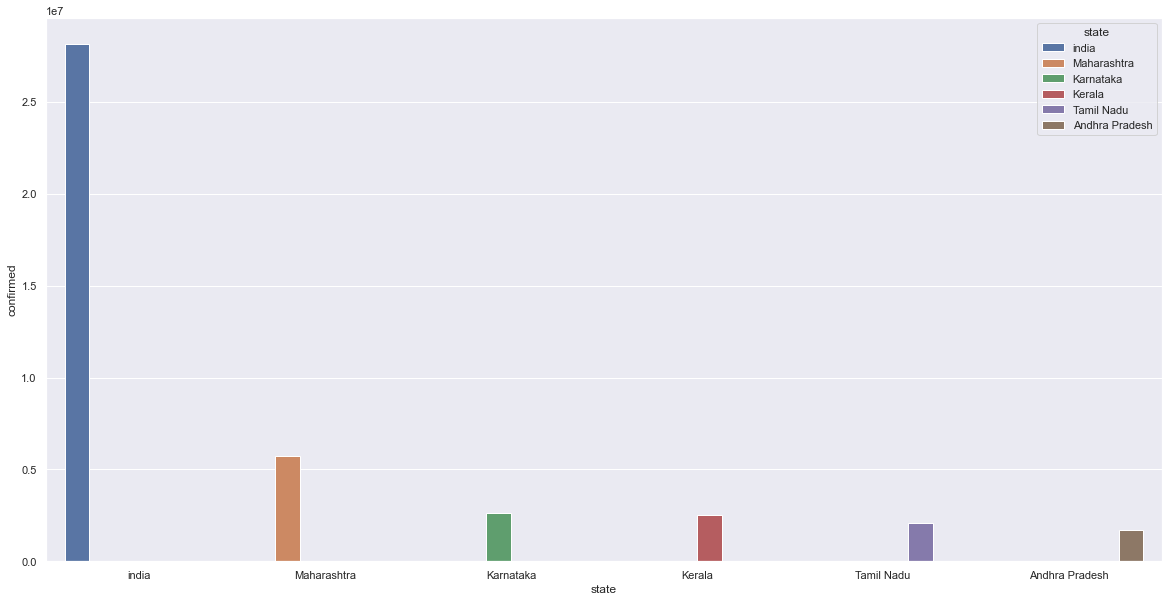

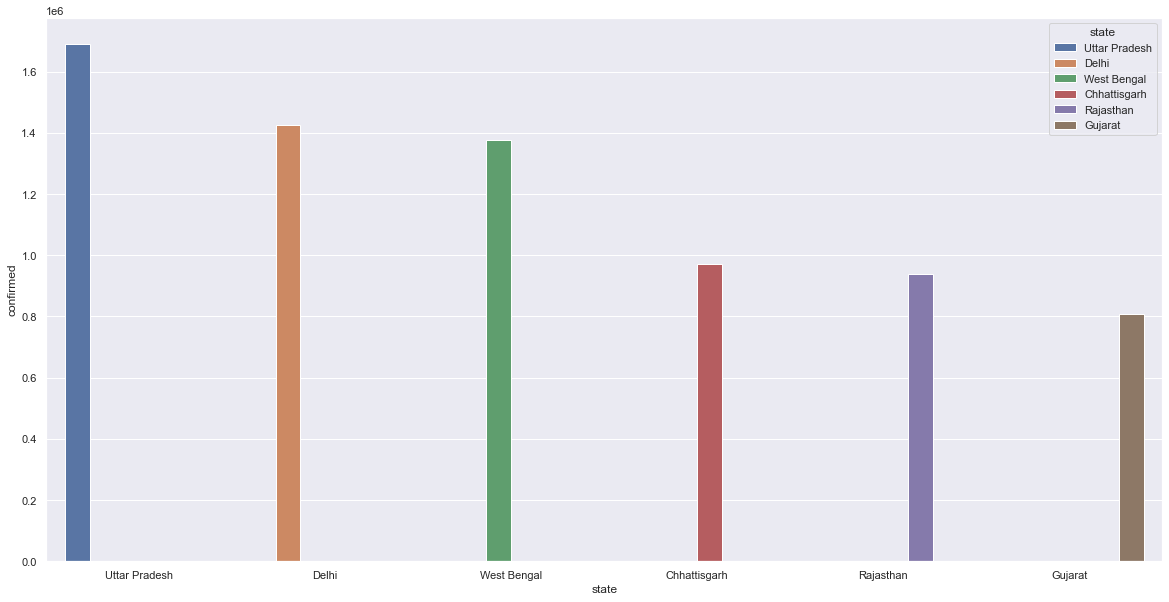

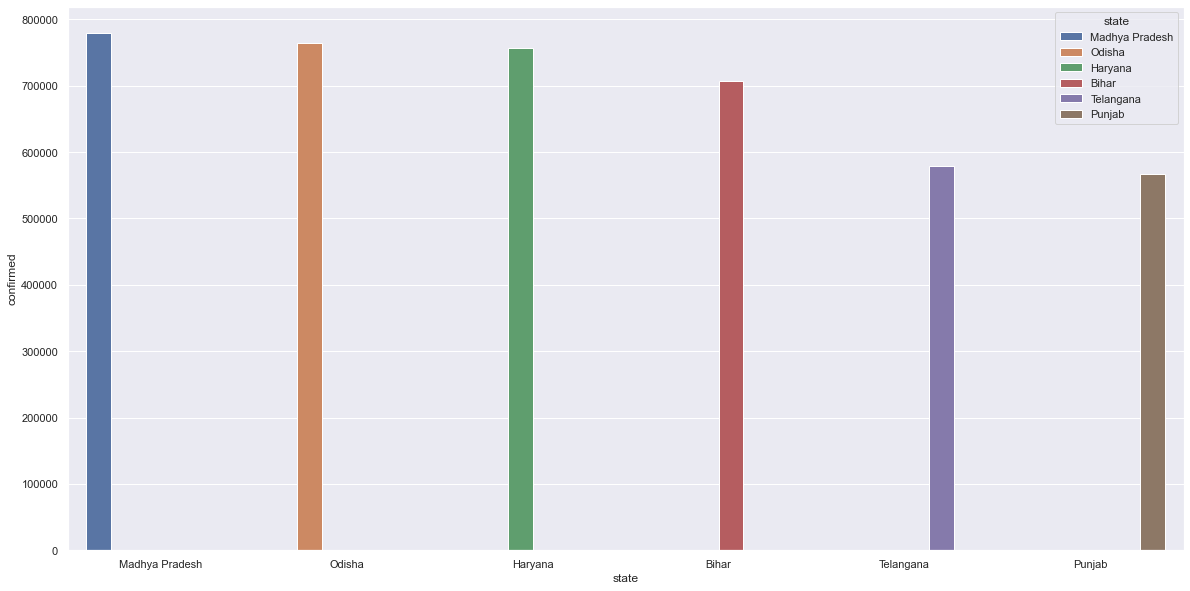

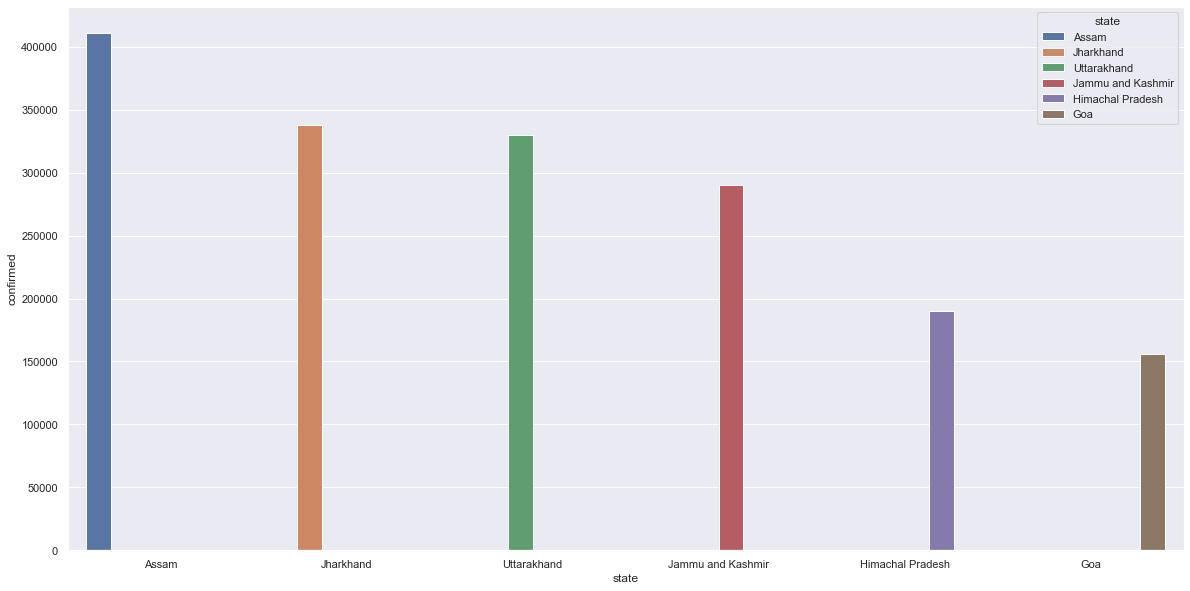

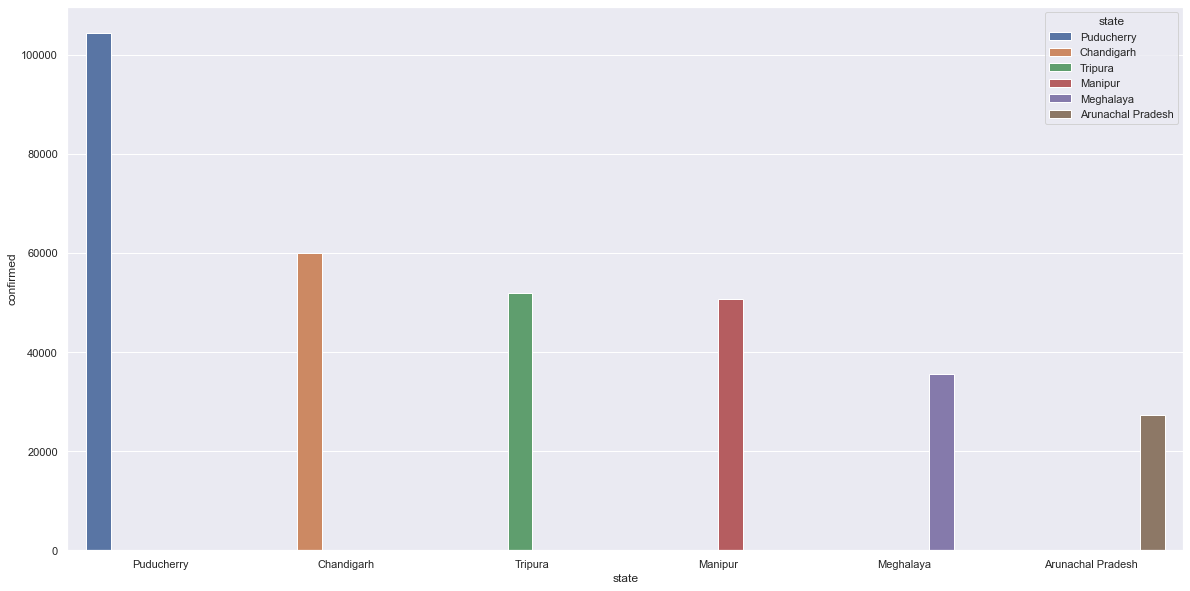

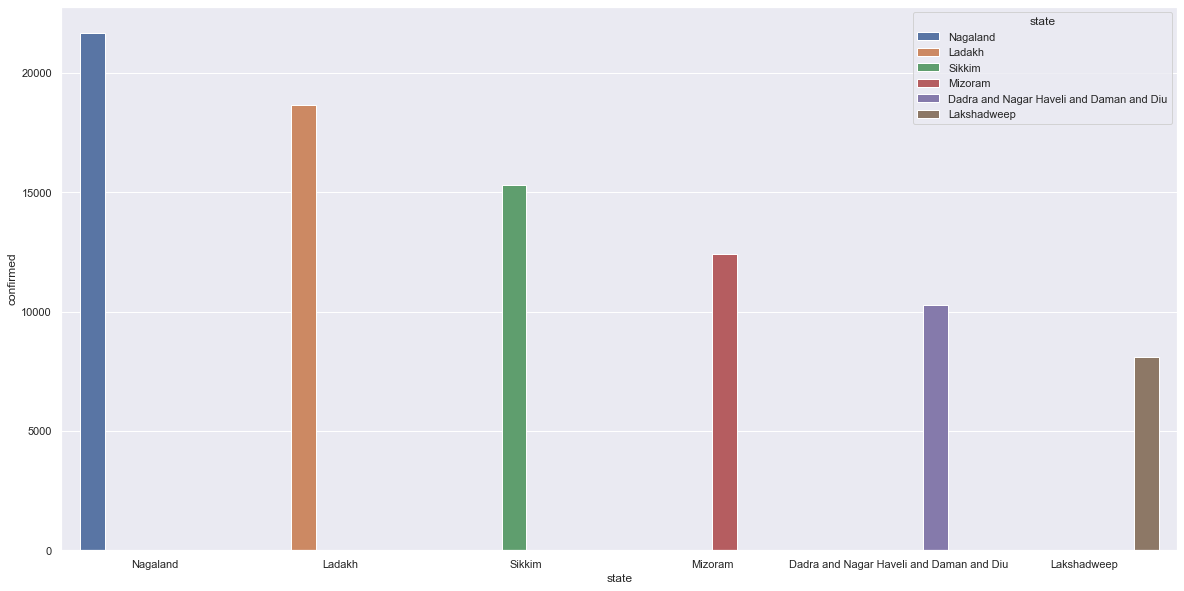

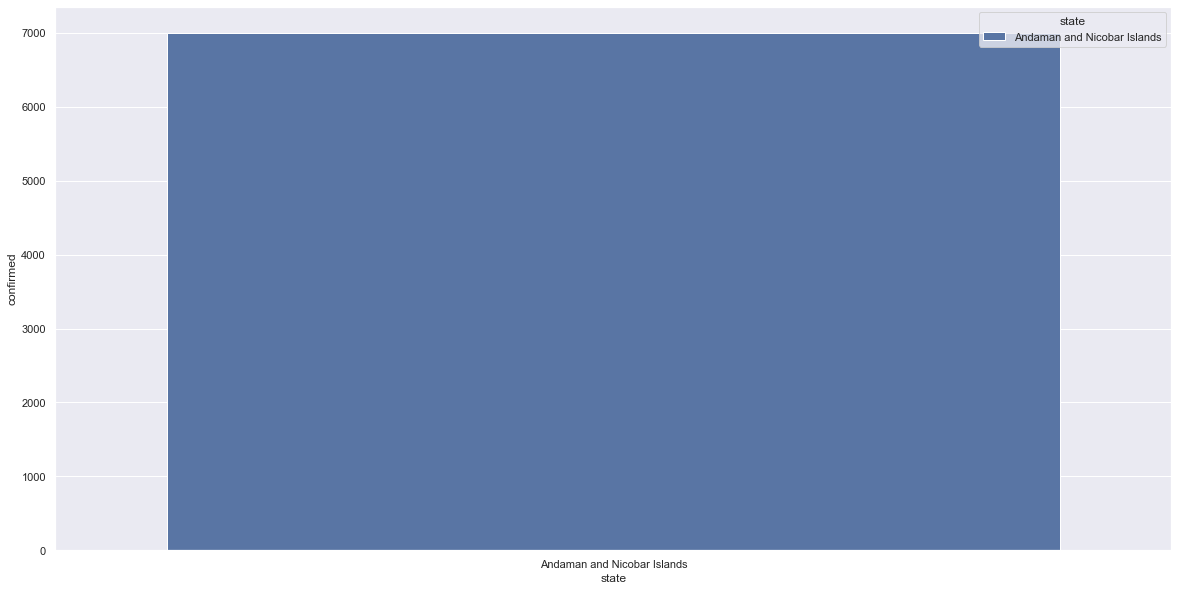

ValueError: min() arg is an empty sequence

In [68]:
for i in range(len(state)):
    new_date = latest_date[x:y+6]
    x+=6
    y+=6
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.barplot(x = "state", y = "confirmed", data = new_date, hue = "state")
    plt.show()
    #time.sleep(1)
    

In [ ]:
#Start date of cases is from 30-01-2020 and end date is 08-05-2021 of our data 

# Visualising the statical data of covid 19 India

# Statewise Visualisation of (Confirmed vs Cured vs Death data of covid)

In [ ]:
#Here we are making Daily cases column in our dataset and returning new dataframe named as result_data

In [ ]:
list1 = []
for i in range(len(state)):
    new_data = data1[data1.state == state.values[i]]
    x = 0
    list = []
    new_data = new_data.reset_index()
    new_data4 = new_data.confirmed.values[0]
    for j in range(len(new_data.confirmed)):
        #print("hello",j)
        new_data1 = new_data.confirmed.values[j]
        if new_data1 == new_data4:
            new_data4 -= 10 
            #print("fuck",new_data1)
            list.append(new_data1)
        if new_data.index.stop != j+1:
            new_data3 = new_data.confirmed.values[j+1] - new_data1
            list.append(new_data3)
        #print(list)
    #print("here",len(list))
    new_data_state = new_data
    new_data_state.insert(6,"daily_cases",list)
    list1.append(new_data_state)
    result_data = pd.concat(list1)
    result_data = result_data.reset_index()

In [ ]:
#Here we are using the ipywidgets of library to make our data more handy to use for users , 
#so they can select the state and look for the data

In [ ]:
temp_state = latest_date.state
new_temp_state = ipywidgets.Dropdown(
                options=temp_state,
                #options = temp_value
                value=temp_state.values[0],
                description='Select state:',
                disabled=False,
                )
#print(new_temp_state.value)
#print(data_select2.value)
#display(new_temp_state)
def select (select):
    temp2_state = result_data[result_data.state == new_temp_state.value]
    temp_value = ["confirmed","death","cured","daily_cases"]
    data_select2 = ipywidgets.Dropdown(
                options= temp_value,
                value=temp_value[0],
                description='Select option:',
                disabled=False,
                )
    
    #print("first",new_temp_state)
    #print("second",temp2_state)
    def data_select(data_select):
        
        sns.set(rc = {'figure.figsize':(15,10)})
        if data_select2.value == "confirmed":
            plot1 = sns.lineplot(x = "date",y = "confirmed", data = temp2_state,color = "g")
        elif data_select2.value == "cured": 
            plot2 = sns.lineplot(x = "date",y = "cured", data = temp2_state, color = "b")
        elif data_select2.value =="death":
            plot3 = sns.lineplot(x = "date",y = "death", data = temp2_state, color = "r")
        elif data_select2.value =="daily_cases":
            plot3 = sns.lineplot(x = "date",y = "daily_cases", data = temp2_state, color = "y")
        #plt.title(new_temp_state)
    data_select(data_select2)
    ipywidgets.interact(data_select, data_select = data_select2)

In [ ]:
# Here Green Line indicating Confirmed Cases of Covid in that state
# Here Blue Line indicating Cured Cases of Covid in that state
# Here red indicating death Cases of Covid in that state

# please select the state and different cases option to visualise your data

In [ ]:
ipywidgets.interact(select, select = new_temp_state)

# Here we are making our prediction based on each state

In [ ]:
#using ipywidgets library to create dropdown option for user to easily select the query
temp_value = ["confirmed","death","cured","daily_cases"]
data_select3 = ipywidgets.Dropdown(
            options= temp_value,
            value=temp_value[0],
            description='Select option:',
            disabled=False,
            )
#making our ultimate state predictor function to predict our data statewise
def ultimate_prediction(predict):
    #creating datepicker for user
    select_date = ipywidgets.DatePicker(
    description='Pick a Date',
    disabled=False
    )
    #creating predict_data function for returning the future cases depend upon the user selection
    def predict_data(prediction):
        from sklearn.model_selection import train_test_split
        #print("first",new_temp_state)
        temp_state_value = result_data[result_data.state == new_temp_state.value]
        temp_state_value['date'] = temp_state_value['date'].map(dt.datetime.toordinal)
        #print("second",temp_state_value['date'])
        #temp_state_value.head()
        x = temp_state_value['date']
        temp = data_select3.value
        #print(temp)
        y = temp_state_value[temp]
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        rf = RandomForestRegressor()
        lr = LinearRegression()
        rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
        lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
        choose_date = select_date.value
        h = None
        #print(choose_date)
        choose_date2 = dt.date.today()
        choose_date2 = choose_date2.toordinal()
        if choose_date == h:
            result1 = rf.predict([[choose_date2]])
            result2 = lr.predict([[choose_date2]])
            
        if choose_date != h:
            choose_date = choose_date.toordinal()
            #print(choose_date)
            result1 = rf.predict([[choose_date]])
            result2 = lr.predict([[choose_date]]) 
        result1 = result1.astype(int)
        result2 = result2.astype(int)
        print('Output from Random Forest Regressor is :',result1)
        print('Output from Linear Regression Model is :',result2)
        return None
    ipywidgets.interact(predict_data, prediction = select_date)
new_temp_state 

# *please select the option to avoid error

# *please note following things

### Confirmed cases is total confirmed cases untill selected day.
### Death cases is total death cases untill selected day.
### Cured cases is total Cures cases untill selected day.
### daily cases is the cases only of that day you select.

In [ ]:
ipywidgets.interact(ultimate_prediction, predict = data_select3)